In [3]:
a = 3 # one-line comment
print(a)

3


In [4]:
a = 3
# one-line comment
print(a)

3


In [5]:
a = 3
"""
many-lines comment
second line
third line
"""
print(a)

3


# Условный оператор if

In [7]:
a = 5
b = 4
if a == 5 and b == 4:
    print("Hi, friend!")

Hi, friend!


In [5]:
if a == 5 or b == 42:
    print("Hi, friend!")

Hi, friend!


In [8]:
if a == 4:
    print("first")
elif b == 4:
    print("second")
elif a == 42:
    print("third")
else:
    print("smth else")

second


Условный оператор в одну строчку

In [9]:
print("Hey!" if b == 24 else 1)

1


## Циклы

In [5]:
for i in [0, 1, 2, 3]:
    print(i + 42)

42
43
44
45


In [1]:
lst = [(1,1), (0,9)]
[el[1] for el in lst]

[1, 9]

In [22]:
[0 for i in range(10)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
[2**i for i in range(10)]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

# Range, генераторы

Для циклов довольно удобна функция range(). Её синтаксис такой:
range(start, stop, step). Она создаёт объект типа range, который содержитт диапазон от start (включительно) до stop (не включительно) с шагом (step). Примеры:

In [26]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [27]:
print(list(range(2, 10)))

[2, 3, 4, 5, 6, 7, 8, 9]


In [28]:
print(list(range(2, 15, 3)))

[2, 5, 8, 11, 14]


Шаг может быть и отрицательным.

In [30]:
print(list(range(10, 3, -2)))

[10, 8, 6, 4]


Довольно удобной иногда бывает функция enumerate(). Она делает из списка новый список, состоящий из пар, где на первом месте стоит номер элемента, а на втором --- сам элемент списка. На примере будет понятнее.

In [39]:
for number, element in enumerate([42, 4242, 424242]): # здесь происходит развертывание
                                                      # аналогичное a, b = [[1, 2],[3, 4]].
    print(number, element)

0 42
1 4242
2 424242


Однако, можно заметить такую тонкость: нельзя взять $i$-ый элемент объекта enumerate([42, 4242, 424242])

In [40]:
enumerate([42, 4242, 424242])[1]

TypeError: 'enumerate' object is not subscriptable

На самом деле, enumerate([42, 4242, 424242]) не равно [[0, 42], [1, 4242], [2, 424242]]. При вызове enumerate() создаётся объект типа $\textbf{генератор}$. Генератор --- это такой объект такого класса, у которого есть метод \_\_next\_\_(). Обычно, к объектам такого типа нельзя применять оператор [], т.е. нельзя вызвать object[0]. Но можно вызвать object.\_\_next\_\_(), который выдаст следующий элемент. Смотрим пример.

In [49]:
a = enumerate([42, 4242, 424242])
print(a)

In [50]:
print(a.__next__())
print(a.__next__())
print(a.__next__())

(0, 42)
(1, 4242)
(2, 424242)


Именно этот вызов метода \_\_next\_\_ и совершает цикл for.

Зачем это нужно? Дело в том, что генераторы способны не создавать и не хранить весь список целиком. Попробуем выполнить следующий код.

In [60]:
for i in range(1, int(1e8)):
    pass

Он выполняется секунд 10, но отрабатывает. Расход оперативной памяти --- нулевой. А вот следующий код я не рекомендую выполнять. Хотя, если никогда не видели, что происходит при переполнении оперативной памяти --- можете выполнить. Только сначала сохраните все свои файлы, вполне может быть, что компьютер придется перезагружать.

In [ ]:
for i in list(range(1, int(1e8))):
    pass

В этом случае я принудительно беру мой range(1, int(1e8)) и создаю из него список. В этом списке будет $10^8$ элементов, что переполняет оперативную память. 

Генераторы можно писать самому (кому интересно --- можно погуглить yield для функций; \_\_next()\_\_ и exception StopIteration для классов).

## Лямбда-выражения

Далее написаны два эквивалентных определения функции f

In [ ]:
f = lambda x, y: x + y

In [ ]:
def f(x, y):
    return x + y

Первое короче. Несколько рецептов, какие можно писать лямбды.

In [1]:
f = lambda: 0 # всегда возвращает 0
f = lambda x: 0 # принимает 1 аргумент и всегда возвращает 0
f = lambda x: x[0] # принимает 1 аргумент и возвращает первый элемент этого аргумента

Интересным является то, что такие функции можно не называть и сразу применять. Например:

In [3]:
(lambda x: x + 2)(4) # создаем функцию, увеличивающую арумент на 2 и применяем к 4

6

Это бывает действительно полезно, если мы хотим передать функцию в качестве аргумента в другую функцию. А такое-то зачем нужно? Например, мы хотим отсортировать список [[1,2],[3,1],[4,-2]] во второму аргементу. Это можно сделать так:

In [4]:
m = [[1,2],[3,1],[4,-2]]
sorted(m, key=lambda x: x[1])

[[4, -2], [3, 1], [1, 2]]

Здесь происходит следующее: мы вызываем сортировку нашего листа m, в аргументе 'key' мы указываем, по чему бы будем сортировать. В данном случае один элемент нашего листа --- пара (1ая пара --- это [1,2]). В key должна передаваться функция, которая принимает 1 элемент списка и выдаёт некоторое число, по которому уже можно будет сортировать. В нашем случае это x[1].

In [19]:
lambda: 0

<function __main__.<lambda>>

In [21]:
(lambda: 0)()

0

# Словари dict

In [1]:
d = {1:set([1,2]), 2:set([3,4])}

In [5]:
m = []
for v in d.values():
    m.append(len(v))

In [6]:
m

[2, 2]

In [7]:
for k in d.keys():
    print(k)

1
2


In [10]:
for k, v in d.items():
    print("k:{}, v:{}".format(k, v))

k:1, v:{1, 2}
k:2, v:{3, 4}


In [ ]:
d = defaultdict()

In [15]:
[132 * i for i in range(10)]

[0, 132, 264, 396, 528, 660, 792, 924, 1056, 1188]

# Сохранение и загрузка из файла

на примере 3ного листа

In [14]:
l = [[[1,2],[3,4]],[[5,6],[7,8]]]
l

[[[1, 2], [3, 4]], [[5, 6], [7, 8]]]

In [17]:
with open("file_name.txt", "w") as f:
    for user_line in l:
        f.write("!\n")
        for pair in user_line:
            f.write(" ".join(map(str,pair)) + "\n")
            
with open("file_name.txt", "r") as f:
    arr = []
    line = f.readline().strip()
    while line != "":
        if line == "!":
            arr.append([])
        else:
            arr[-1].append(list(map(int, line.split())))
        line = f.readline().strip()

In [27]:
with open("file_name.txt", "r") as f:
    arr = []
    line = f.readline().strip()
    while line != "":
        if line == "!":
            arr.append([])
        else:
            arr[-1].append(list(map(int, line.split())))
        line = f.readline().strip()

In [28]:
arr

[[[1, 2], [3, 4]], [[5, 6], [7, 8]]]

In [23]:
a.strip()

'asd'

# Ipython

clear_outpur() при вызове очищает вывод текущей ячейки

In [3]:
from IPython.display import clear_output

In [6]:
for i in range(5):
    print(i)
    clear_output()

# Random

Библиотека для работы со случайными числами

In [7]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

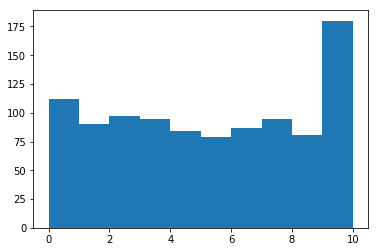

In [8]:
m = []
for i in range(1000):
    m.append(random.randint(0, 10)) # равномерное распределение на множестве range(10)
plt.hist(m)
plt.show()

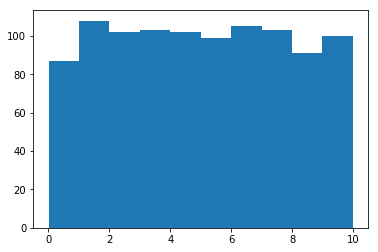

In [9]:
m = []
for i in range(1000):
    m.append(random.random() * 10) # равномерное распределение на отрезке [0, 1]
plt.hist(m)
plt.show()

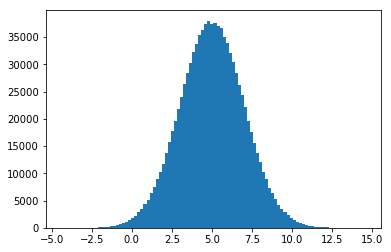

In [10]:
m = []
for i in range(1000000):
    m.append(random.gauss(5, 2)) # гауссово (нормальное) распределение на отрезке [0, 1]
plt.hist(m, bins=100)
plt.show()

seed - сущность, инициализирующая генератор псевдослучайных чисел. после её установки запуски кода со случайностями будут работать одинаково.

In [17]:
for i in range(3):
    random.seed(13)
    print(random.random())

0.2590084917154736
0.2590084917154736
0.2590084917154736


In [18]:
random.seed(13)
for i in range(3):
    print(random.random())

0.2590084917154736
0.6852579929645369
0.6840819180161107


In [23]:
x = [1, 2, 5, 12]
random.shuffle(x) # делает случайную перестановку x, изменяя x, при этом ничего не возвращает

In [24]:
x

[12, 5, 1, 2]

# Classes

In [6]:
class SiriusChild:
    def __init__(self, sex, age):
        '''
        param sex: 0 for man, 1 for woman
        '''
        self.sex = sex
        self.age = age
    def has_same_age(self, other):
        if self.age == other.age:
            return True
        else:
            return False
    def summarise_children(self, other):
        return SiriusChild(1, self.age + other.age)
    def __str__(self):
        sex = {1: "woman", 0: "man"}
        return "{} with age {}".format(sex[self.sex], self.age)
    def __add__(self, other):
        '''
        returns tuple containing self and other childrens
        '''
        result = (self, other)
        return result

In [7]:
child = SiriusChild(1, 16)
child2 = SiriusChild(0, 165)

In [8]:
child.has_same_age(child2)

False

In [27]:
for el in child + child2:
    print(el)

woman with age 16
man with age 165


In [9]:
class Vector:
    def __init__(self, m):
        '''
        type of m is list
        '''
        self.coordinates = m
    def __add__(self, other):
        result = []
        for i in range(len(self.coordinates)):
            result.append(self.coordinates[i] + other.coordinates[i])           
        return Vector(result)
    def __str__(self):
        return "вектор с координатами {}".format(self.coordinates)

In [10]:
v = Vector([1, 2, 3])
v2 = Vector([1, 2, 5])

In [12]:
print(v)
print(v.__str__())
print(str(v))

вектор с координатами [1, 2, 3]
вектор с координатами [1, 2, 3]
вектор с координатами [1, 2, 3]


# Numpy

Библиотека для работы с матрицами

In [25]:
import numpy as np

In [26]:
m = np.array([1,2,3,4])

In [27]:
for el in m:
    print(el)

1
2
3
4


In [28]:
m[:1], m[:], m[1:], m[1:10000]

(array([1]), array([1, 2, 3, 4]), array([2, 3, 4]), array([2, 3, 4]))

In [29]:
m.reshape(2, 2) # то же самое m.reshape(2, -1)

array([[1, 2],
       [3, 4]])

In [30]:
m

array([1, 2, 3, 4])

In [31]:
m_reshaped = m.reshape(2, -1)
m_reshaped

array([[1, 2],
       [3, 4]])

In [32]:
m_reshaped[1:, 1:]

array([[4]])

In [33]:
m_reshaped[1:, :]

array([[3, 4]])

In [34]:
a = np.array([3,3,3,3]).reshape(2, 2)
b = np.array([2,2,2,2]).reshape(2, 2)

In [35]:
a + b # поэлементное сложение

array([[5, 5],
       [5, 5]])

In [36]:
a * b # поэлементное умножение

array([[6, 6],
       [6, 6]])

In [37]:
a / b # поэлеметное деление (и вычитать можно!)

array([[ 1.5,  1.5],
       [ 1.5,  1.5]])

In [38]:
a.dot(b) # матричное перемножение

array([[12, 12],
       [12, 12]])

Сделаем случайную матрицу $400 \times 400$ и выведем её как картинку

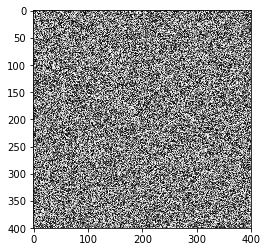

In [119]:
l = []
c = 160000
for i in range(c):
    l.append(random.random())
arr = np.array(l).reshape(400, 400)
plt.imshow(arr, cmap="gray")
plt.show()

А теперь цветную

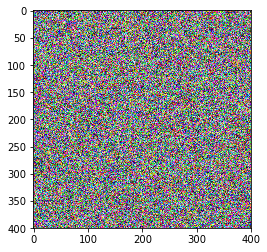

In [39]:
l = []
c = 160000 * 3
for i in range(c):
    l.append(random.random())
arr = np.array(l).reshape(400, 400, 3)
plt.imshow(arr)
plt.show()

А теперь будем инициализировать каждое число случайным образом не из равномерного распределения, а из нормального с матожиданием 0.5 и стандартным отклонением 2.

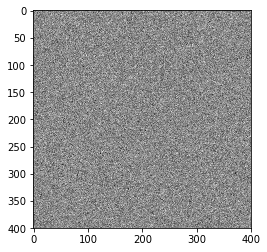

In [117]:
l = []
c = 160000
for i in range(c):
    l.append(random.gauss(0.5, 2))
arr = np.array(l).reshape(400, 400)
plt.imshow(arr, cmap="gray")
plt.show()

Сравним картинки для гауссовского шума и для равномерного

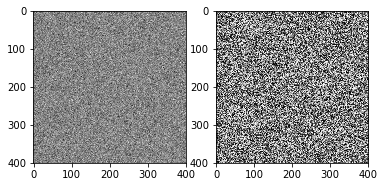

In [40]:
plt.subplot(1, 2, 1)
l = []
c = 160000
for i in range(c):
    l.append(random.gauss(0.5, 2))
arr = np.array(l).reshape(400, 400)
plt.imshow(arr, cmap="gray")
plt.subplot(1, 2, 2)
l = []
c = 160000
for i in range(c):
    l.append(random.random())
arr = np.array(l).reshape(400, 400)
plt.imshow(arr, cmap="gray")
plt.show()

При гауссовской инициализации чаще возникают "серые" значения 0.5 и очень редко встречаются сильно белые или сильно темные точки. При равномерном распределении всё встречается одинаково часто.

Выбор из набора чисел с заданными вероятностями np.random.choice(arr, p)
arr - откуда выбирать, p - с какими вероятностями.

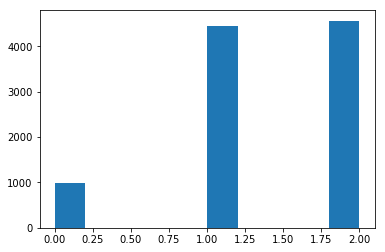

In [45]:
arr = np.array(range(3))
random_values = []
for i in range(10000):
    random_values.append(np.random.choice(arr, p=[0.1, 0.45, 0.45]))
plt.hist(random_values)
plt.show()

In [3]:
a = np.array([1,2,3])
np.save("123", a)
b = np.load("123.npy")
b

array([1, 2, 3])

# matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Как управлять размером картинки:

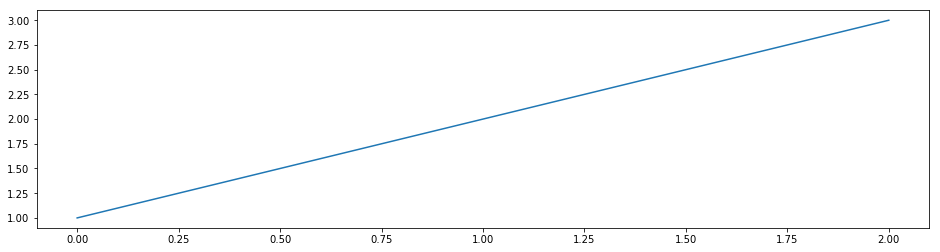

In [130]:
plt.figure(figsize=(16, 4))
plt.plot([1, 2, 3])
plt.show()

#### Отдельные точки

In [132]:
np.random.rand(5, 5)

array([[ 0.90165034,  0.27162281,  0.89346053,  0.3144586 ,  0.68588983],
       [ 0.6850616 ,  0.47482441,  0.23828211,  0.72393709,  0.76126311],
       [ 0.49658837,  0.25200169,  0.76256955,  0.56358355,  0.17886382],
       [ 0.00247338,  0.33457813,  0.68275663,  0.7217775 ,  0.37254657],
       [ 0.56366513,  0.2261495 ,  0.1728346 ,  0.16554748,  0.94132975]])

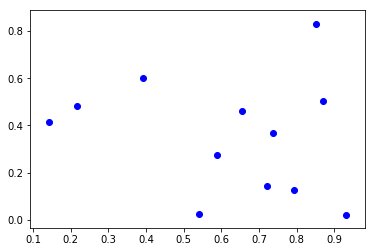

In [134]:
x = np.random.rand(12)
y = np.random.rand(12)

plt.scatter(x, y, color = 'blue')
plt.show()

Несколько сущностей на одном чертеже:

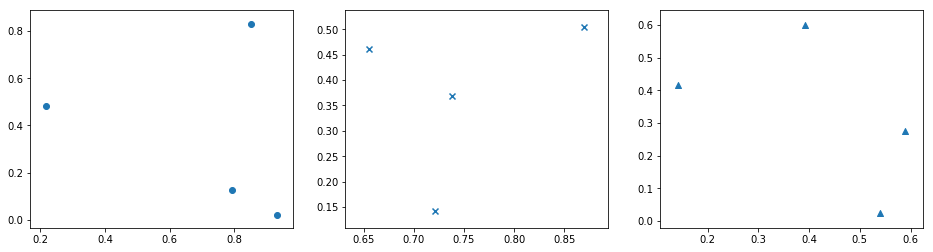

In [140]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1), plt.scatter(x[0:4], y[0:4])
plt.subplot(1, 3, 2), plt.scatter(x[4:8], y[4:8], marker = 'x')
plt.subplot(1, 3, 3), plt.scatter(x[8:12], y[8:12], marker = '^')
plt.show()

Провести кривые

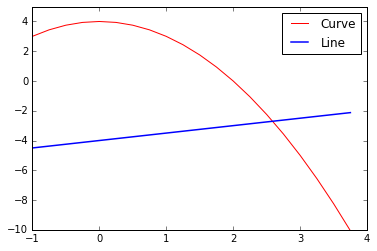

In [6]:
x = np.arange(-1.0, 4.0, 0.25)
curve, = plt.plot(x, 4. - x ** 2, linewidth=1.0, color='red')
line, = plt.plot(x, 0.5 * x - 4., linewidth=1.5, color='blue')

# Add a legend:
plt.legend([curve, line], ['Curve', 'Line'])

# Изменим пределы по оси у, чтобы графики выглядели более пристойно:
plt.ylim([-10., 5.])

plt.show()

Точки в трёхмерном пространстве (более далёкие нарисованы выглядят более тусклыми)

In [7]:
from mpl_toolkits.mplot3d import Axes3D

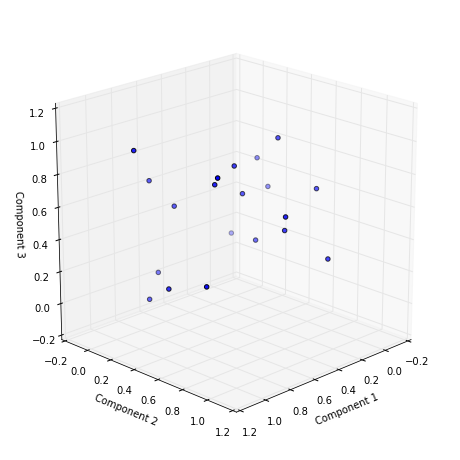

In [8]:
x = np.random.rand(20)
y = np.random.rand(20)
z = np.random.rand(20)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Этот инструмент позволяет менять точку зрения
ax.view_init(elev=20, azim=45)
plt.show()

# Collections

In [1]:
arr = [1,3,2,1,1,0]
from collections import Counter
sorted(Counter(arr).items(), key=lambda x: x[1])[0][1] # выводит самую частую метку в arr

1